In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
!echo $CUDA_VISIBLE_DEVICES

0


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [3]:
from examples.dw4 import *
import target.double_well as dw4
from examples.train import plot_sample_hist, eval_fn, original_dataset_to_joint_dataset, default_plotter
import yaml
import matplotlib.pyplot as plt

/scratch/lim24/augmented-equivariant-flows/examples/train.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2023-02-12 21:48:47.122312: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-12 21:48:47.122467: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-12 21:48:47.122482: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

In [4]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [5]:
cfg = DictConfig(yaml.safe_load(open("examples/config/dw4.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'target': {'aug_global_centering': False, 'aug_scale': 1.0, 'custom_samples': True, 'temperature': 0.1}, 'flow': {'dim': 2, 'nodes': 4, 'n_layers': 4, 'identity_init': True, 'type': ['proj', 'nice'], 'kwargs': {'proj_v2': {'global_frame': False, 'process_flow_params_jointly': False, 'gram_schmidt': False, 'mlp_function_units': [16]}}, 'act_norm': False, 'fast_compile': True, 'compile_n_unroll': 1, 'egnn': {'emile_net': False, 'mlp_units': [32, 32], 'n_layers': 3, 'normalize_by_norms': True, 'variance_scaling_init': 0.001, 'tanh': False, 'agg': 'mean', 'phi_x_max': 1.0, 'h': {'linear_softmax': True, 'share_h': True}}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 3, 'key_size': 4, 'w_init_scale': 0.1, 'n_layers': 3}}, 'training': {'lr': '4e-4', 'use_64_bit': False, 'optimizer_name': 'adam', 'n_epoch': 50, 'batch_size': 100, 'plot_batch_size': 256, 'max_global_norm': None, 'seed': 0, 'reload_aug_per_epoch': True, 'train_set_size': 1000, 'test_se

# Setup dataset

In [6]:
cfg.target.temperature=1.0
load_dataset = partial(load_dataset_custom, temperature=cfg.target.temperature)

# Aug target conditional per point

In [7]:
cfg.training.lr = 6e-4
cfg.flow.egnn.mlp_units = (32, 32)
cfg.flow.n_layers=3


cfg.target.aug_global_centering = False
cfg.target.aug_scale = 1.0

cfg.flow.egnn.n_layers = 3
cfg.training.batch_size = 200
cfg.training.n_epoch = 100
cfg.training.save = False
cfg.training.plot_batch_size = 256
cfg.logger = DictConfig({"list_logger": None})

cfg.flow.type= "nice"
cfg.flow.act_norm = False

creating flow of type nice
training data shape of (1000, 4, 2)


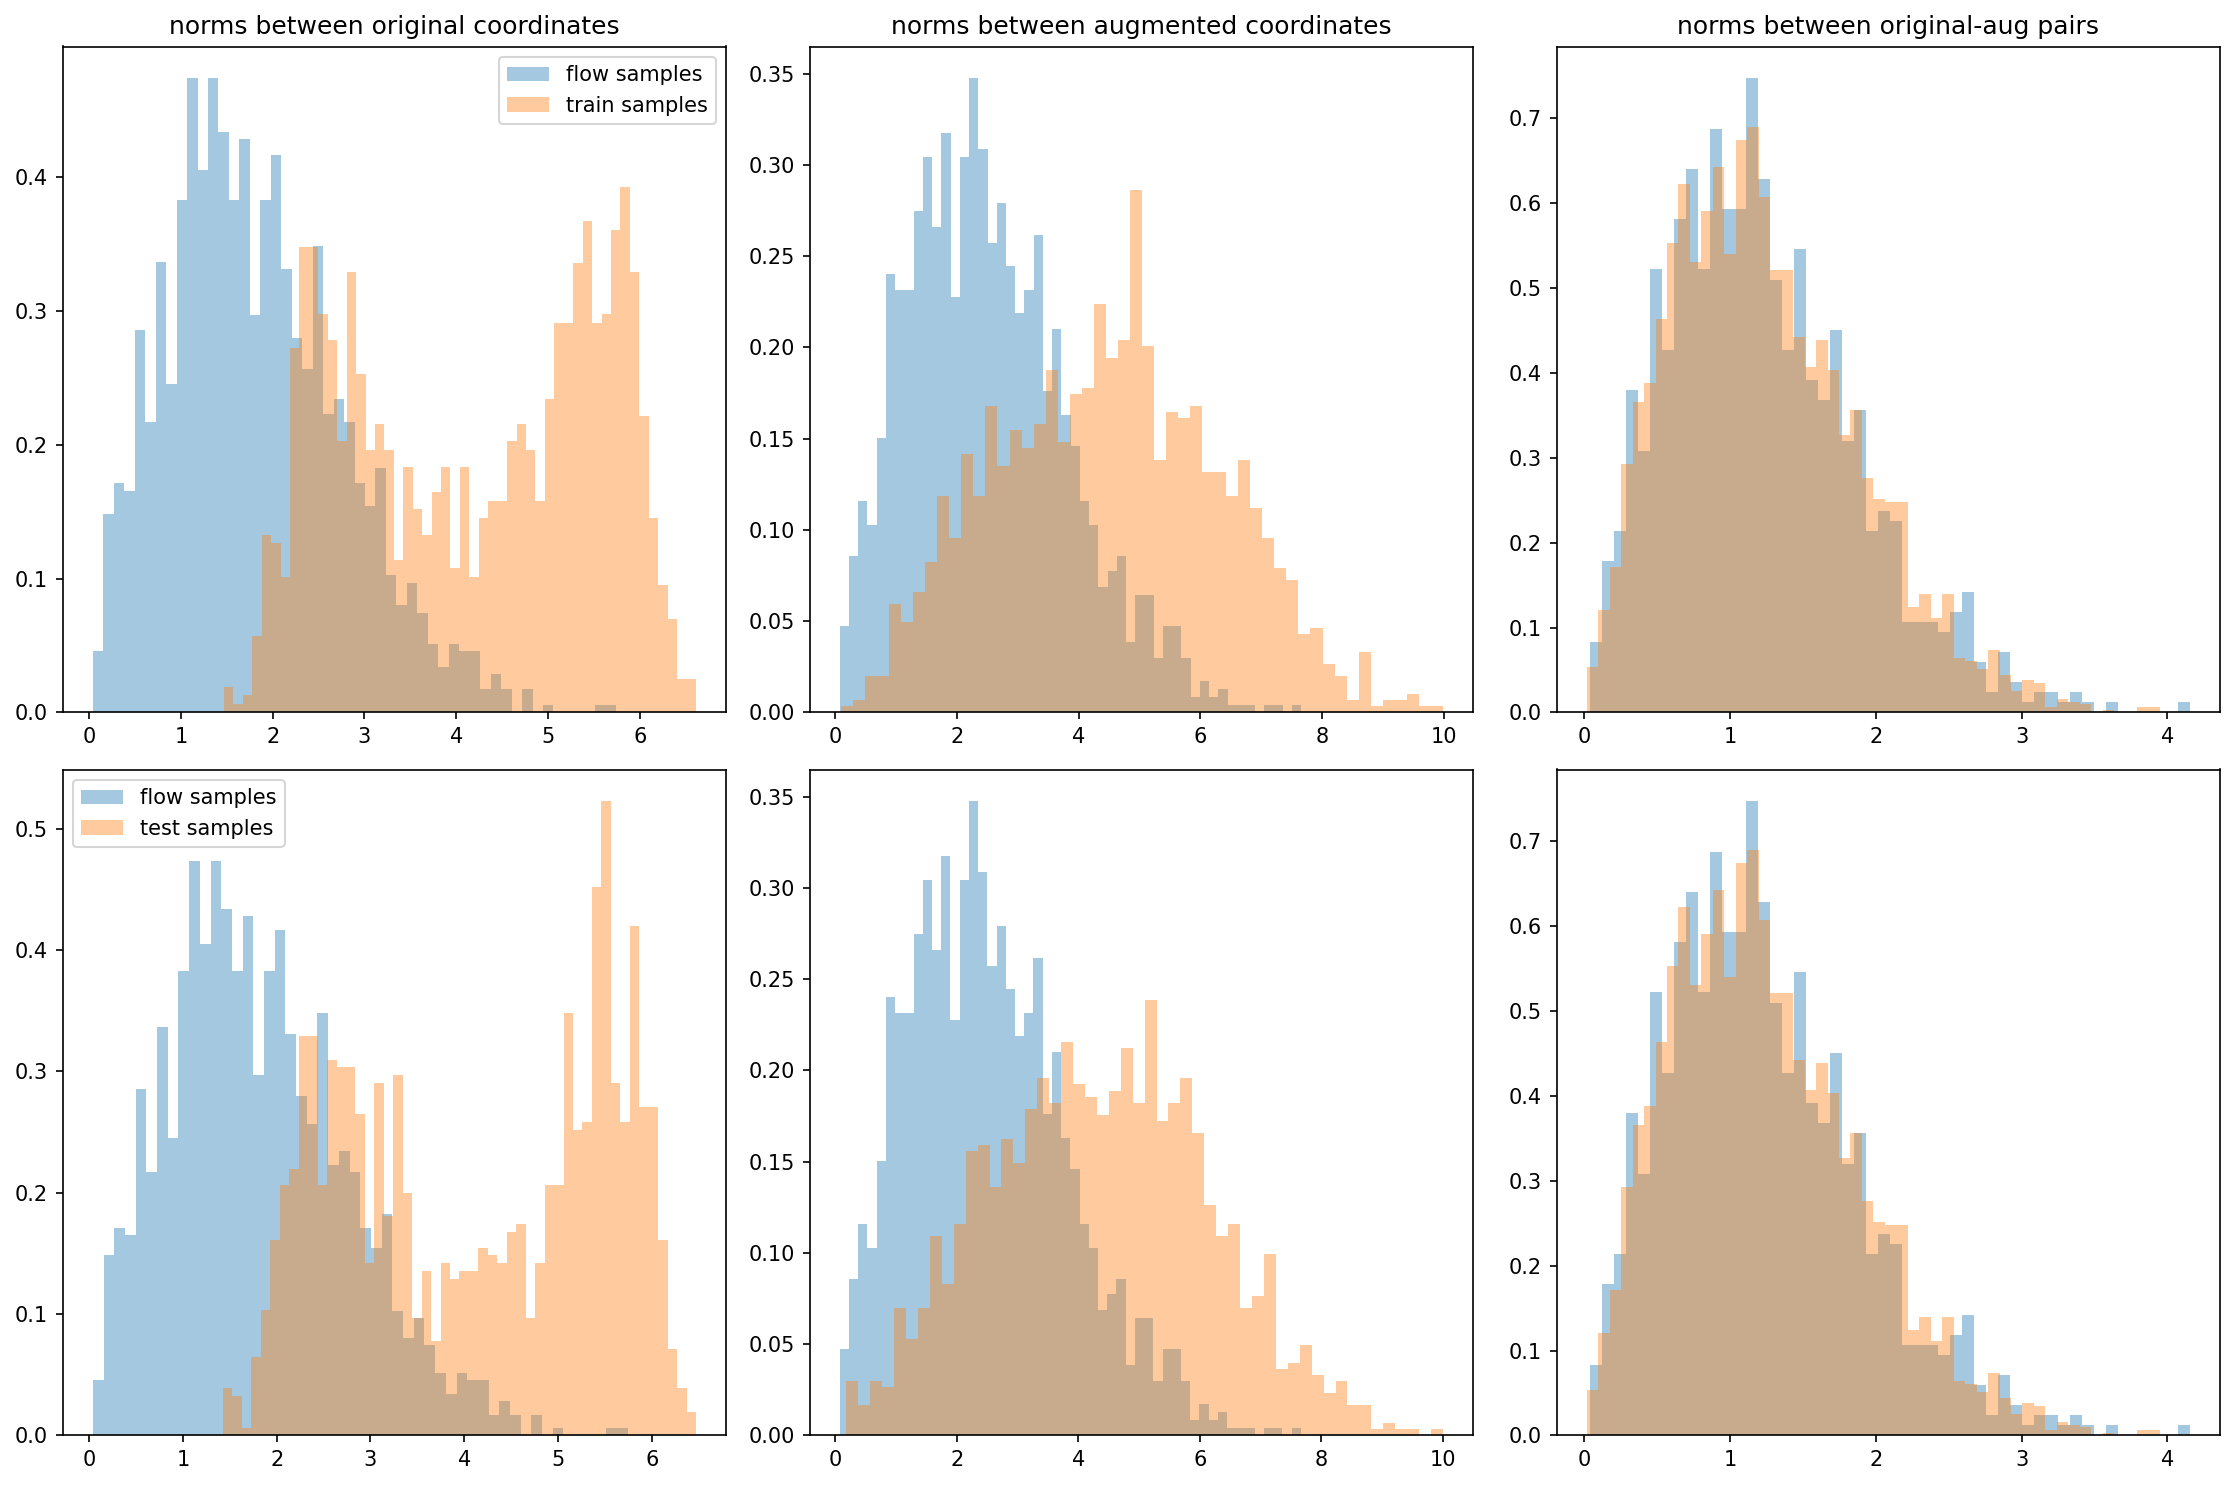

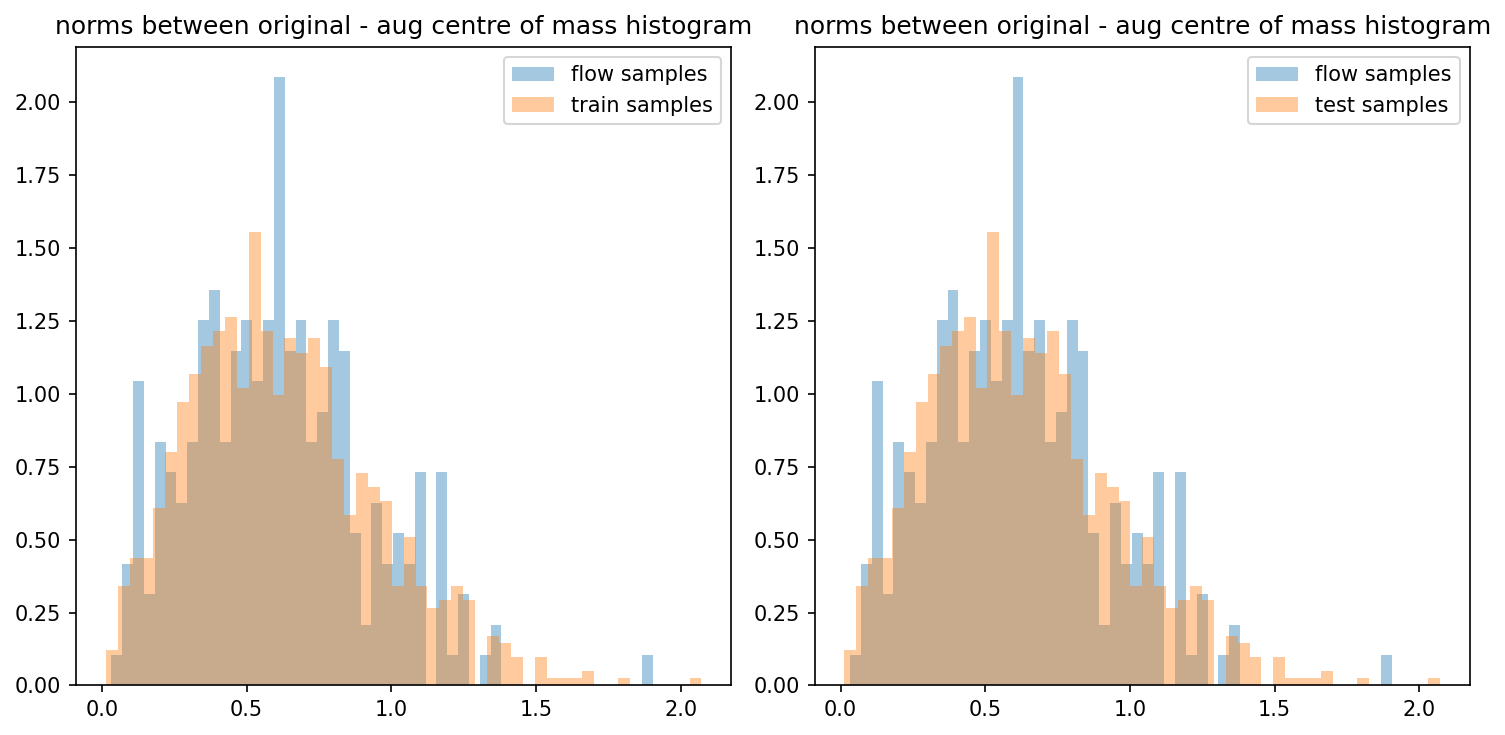

  0%|                                                   | 0/100 [00:00<?, ?it/s]

non numeric history values being saved


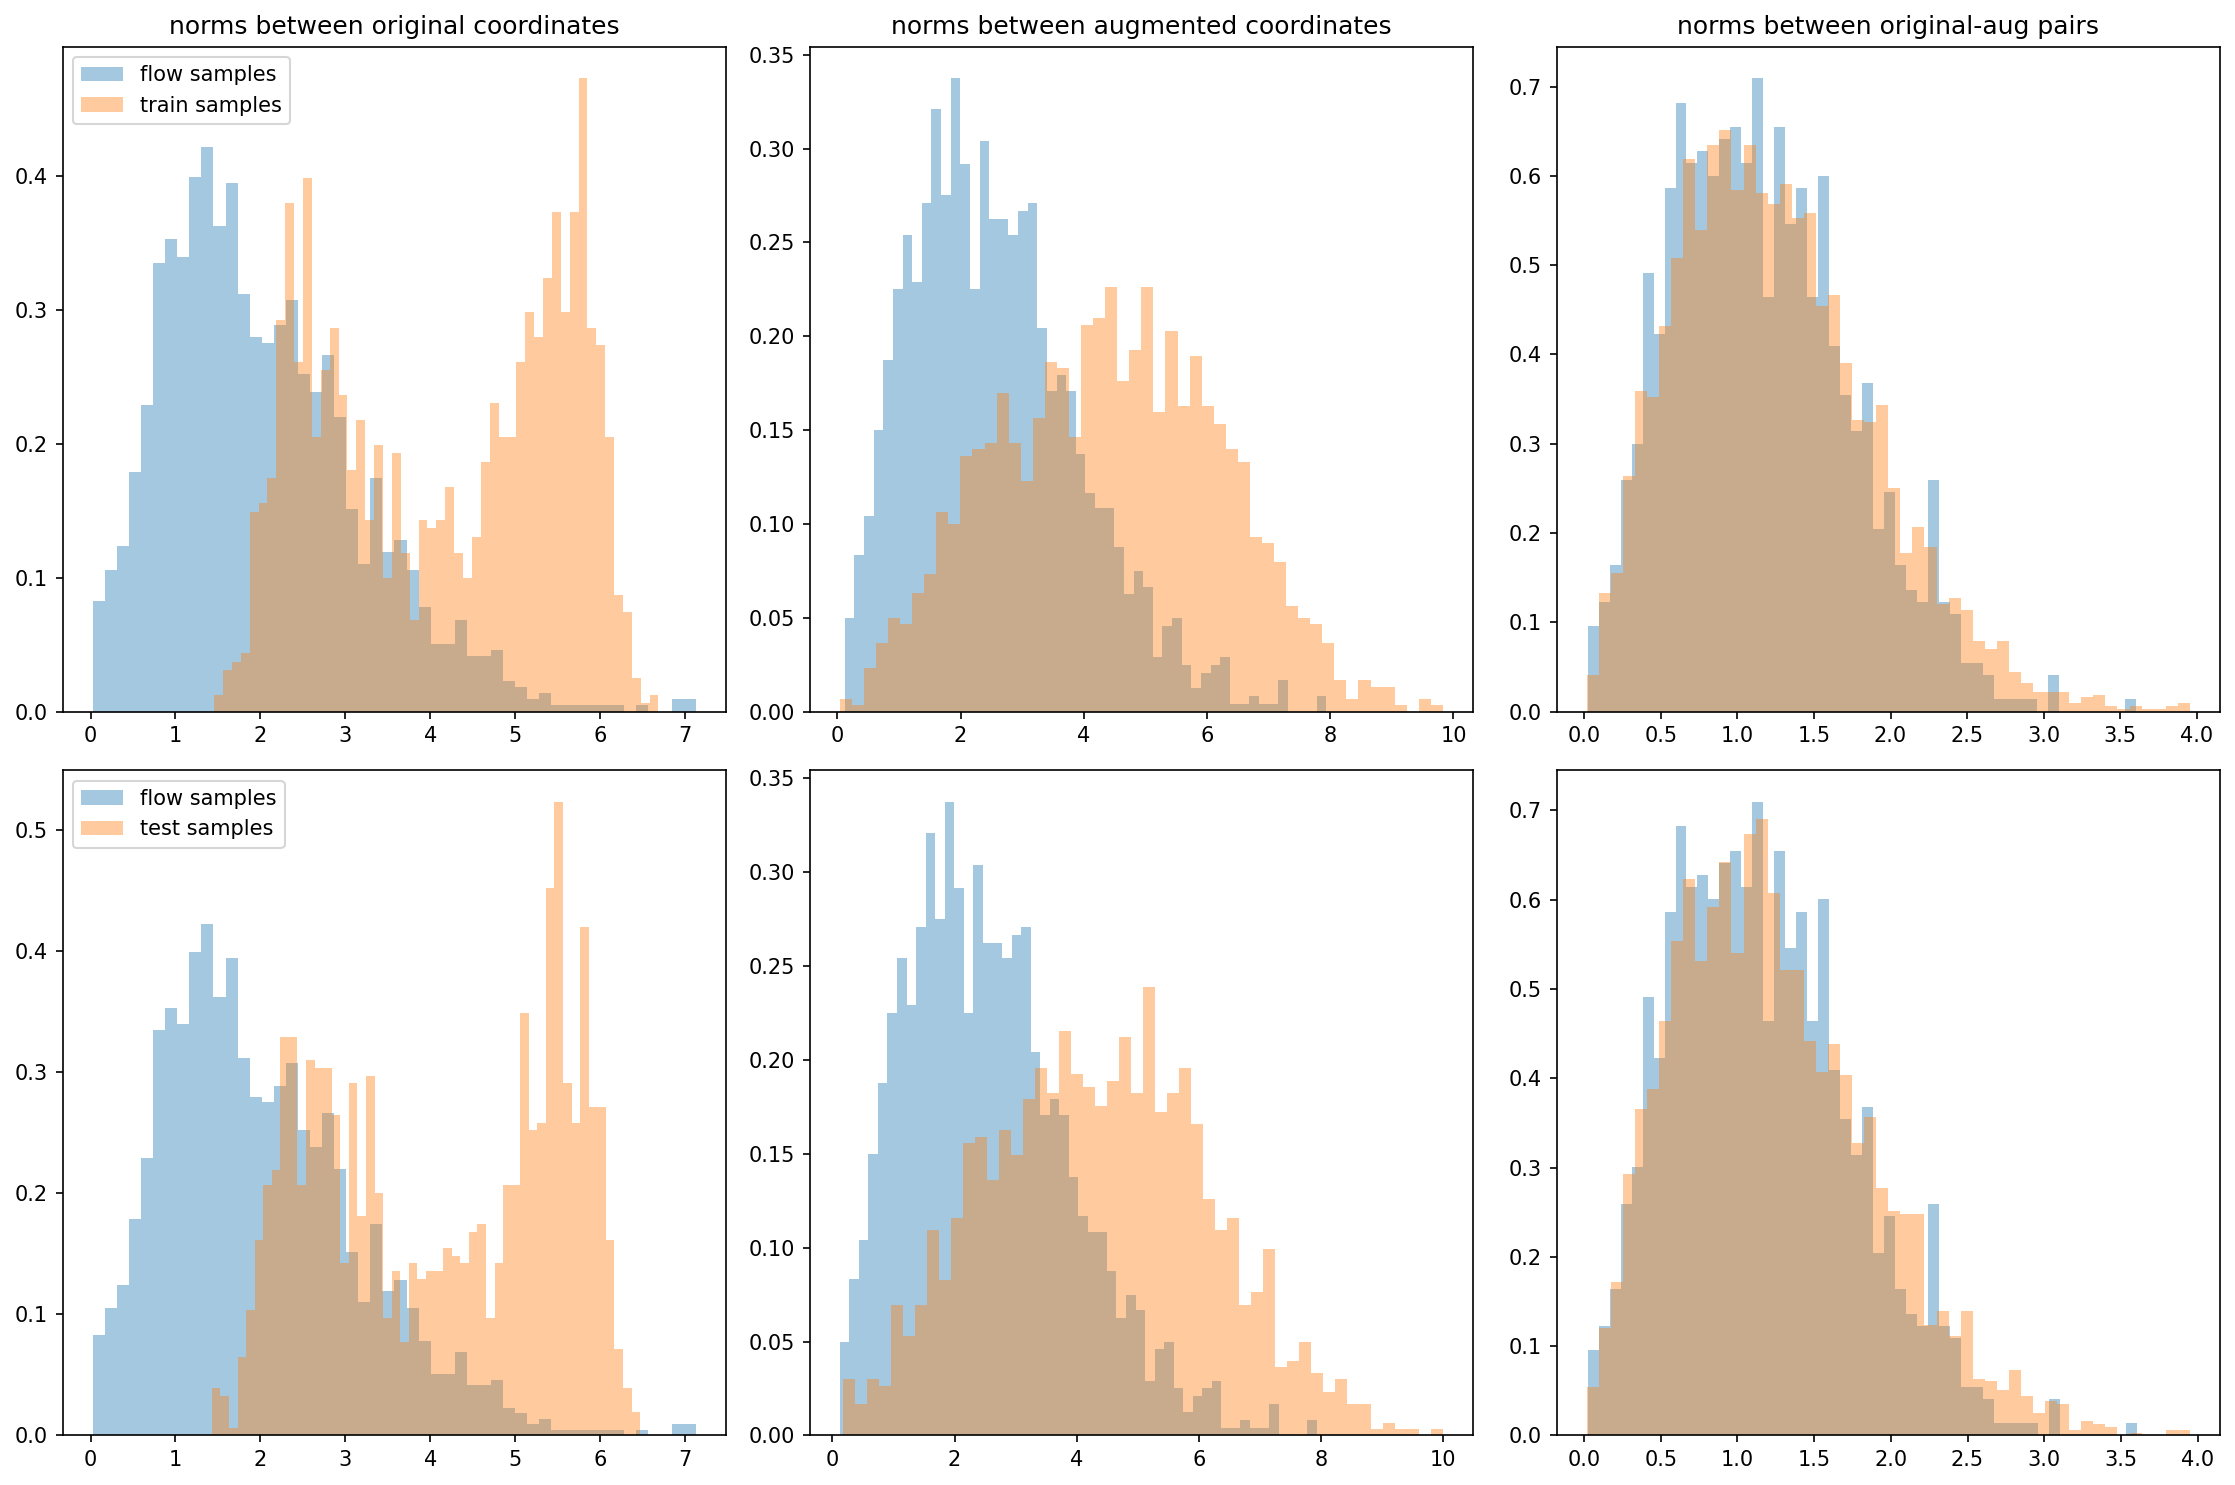

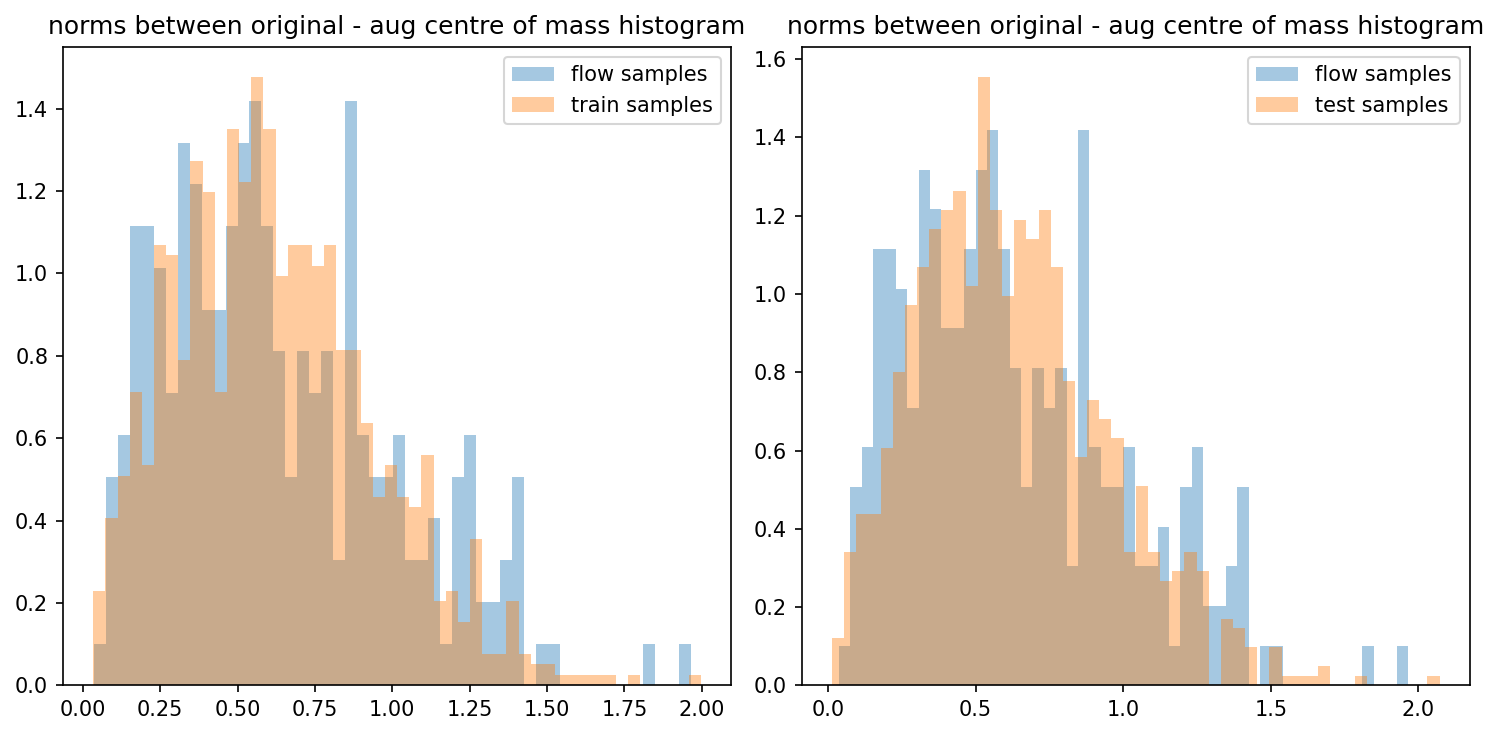

  2%|▊                                          | 2/100 [00:19<13:09,  8.05s/it]

{'eval_log_lik': Array(-27.779112, dtype=float32), 'eval_marginal_log_lik': Array(-14.212272, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(7.095337e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.320839e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.6149932, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.340338, dtype=float32)}


 13%|█████▍                                    | 13/100 [00:20<00:31,  2.79it/s]

{'eval_log_lik': Array(-25.373764, dtype=float32), 'eval_marginal_log_lik': Array(-11.823232, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00010262, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.5235901e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.623808, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.8913, dtype=float32)}


 19%|███████▉                                  | 19/100 [00:20<00:13,  5.91it/s]

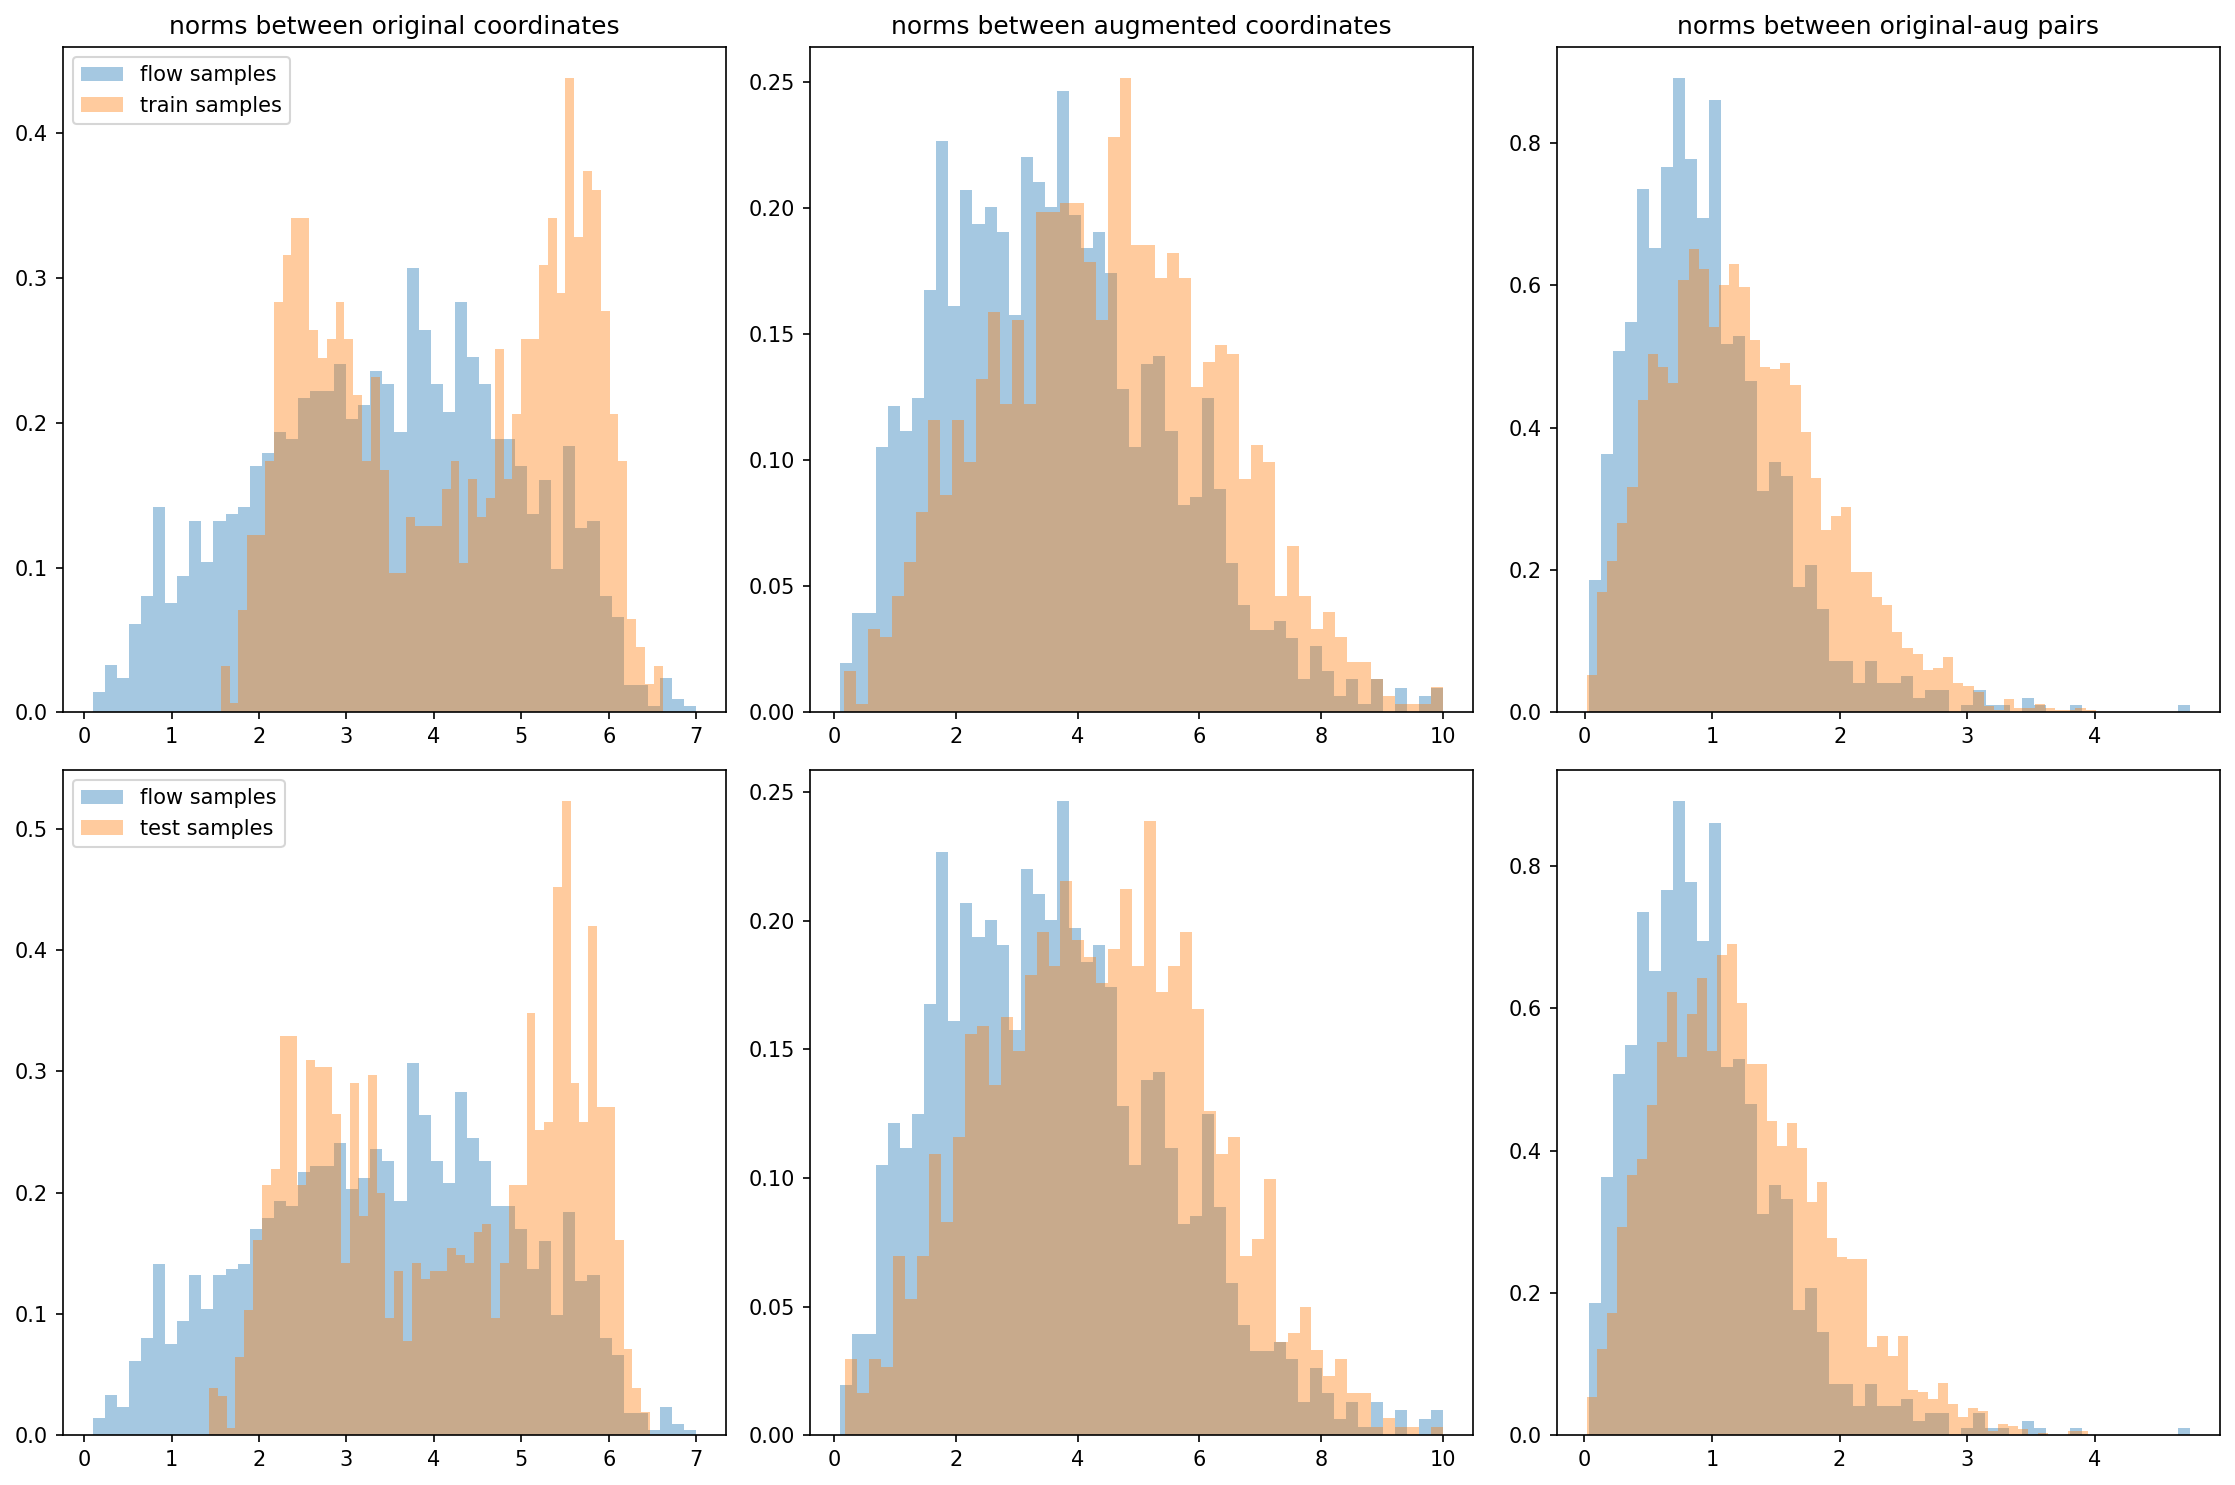

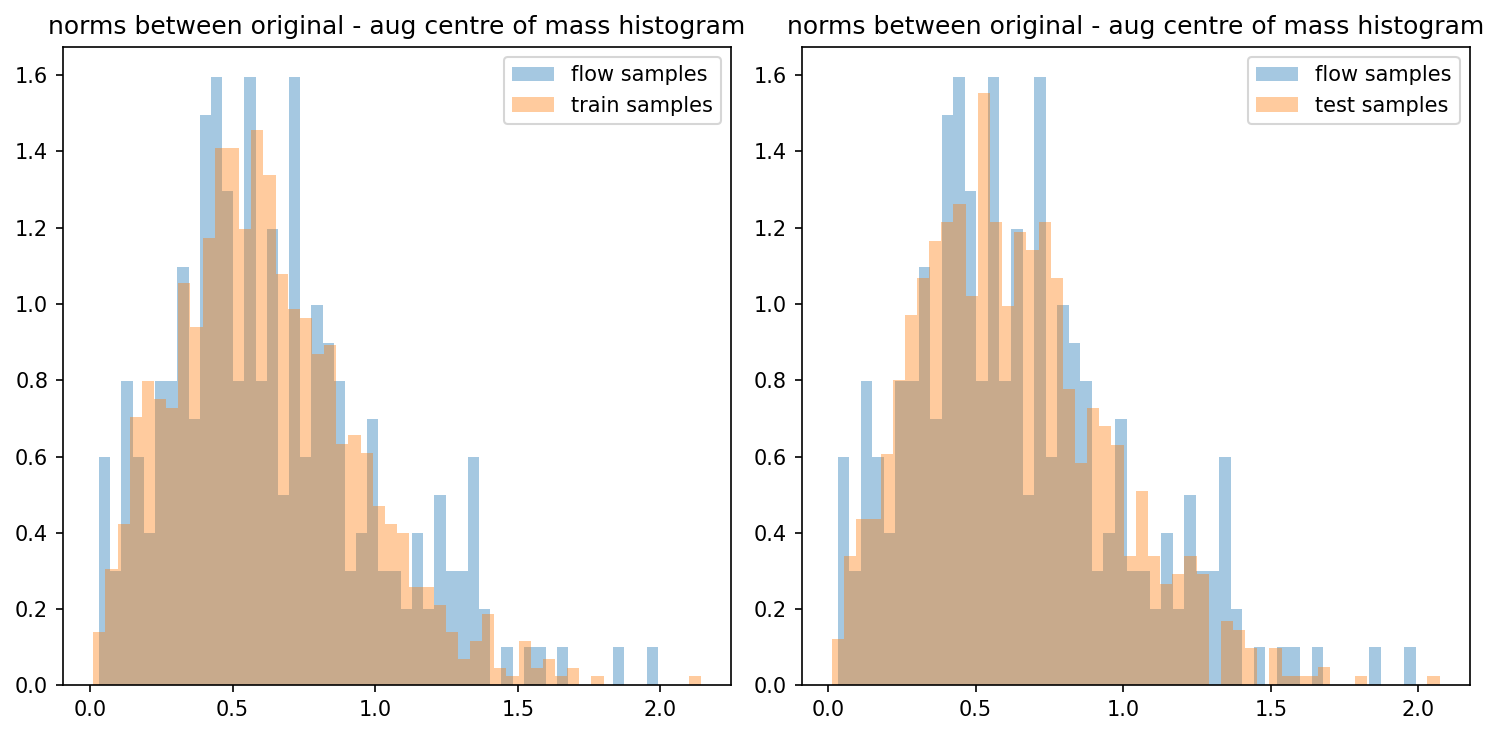

 25%|██████████▌                               | 25/100 [00:25<00:26,  2.81it/s]

{'eval_log_lik': Array(-24.908583, dtype=float32), 'eval_marginal_log_lik': Array(-11.34579, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.506775e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.5023232e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.66405517, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.883106, dtype=float32)}


 35%|██████████████▋                           | 35/100 [00:26<00:08,  8.01it/s]

{'eval_log_lik': Array(-24.622864, dtype=float32), 'eval_marginal_log_lik': Array(-11.009565, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00010071, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.4133453e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.67431104, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.55188, dtype=float32)}


 39%|████████████████▍                         | 39/100 [00:26<00:06,  9.60it/s]

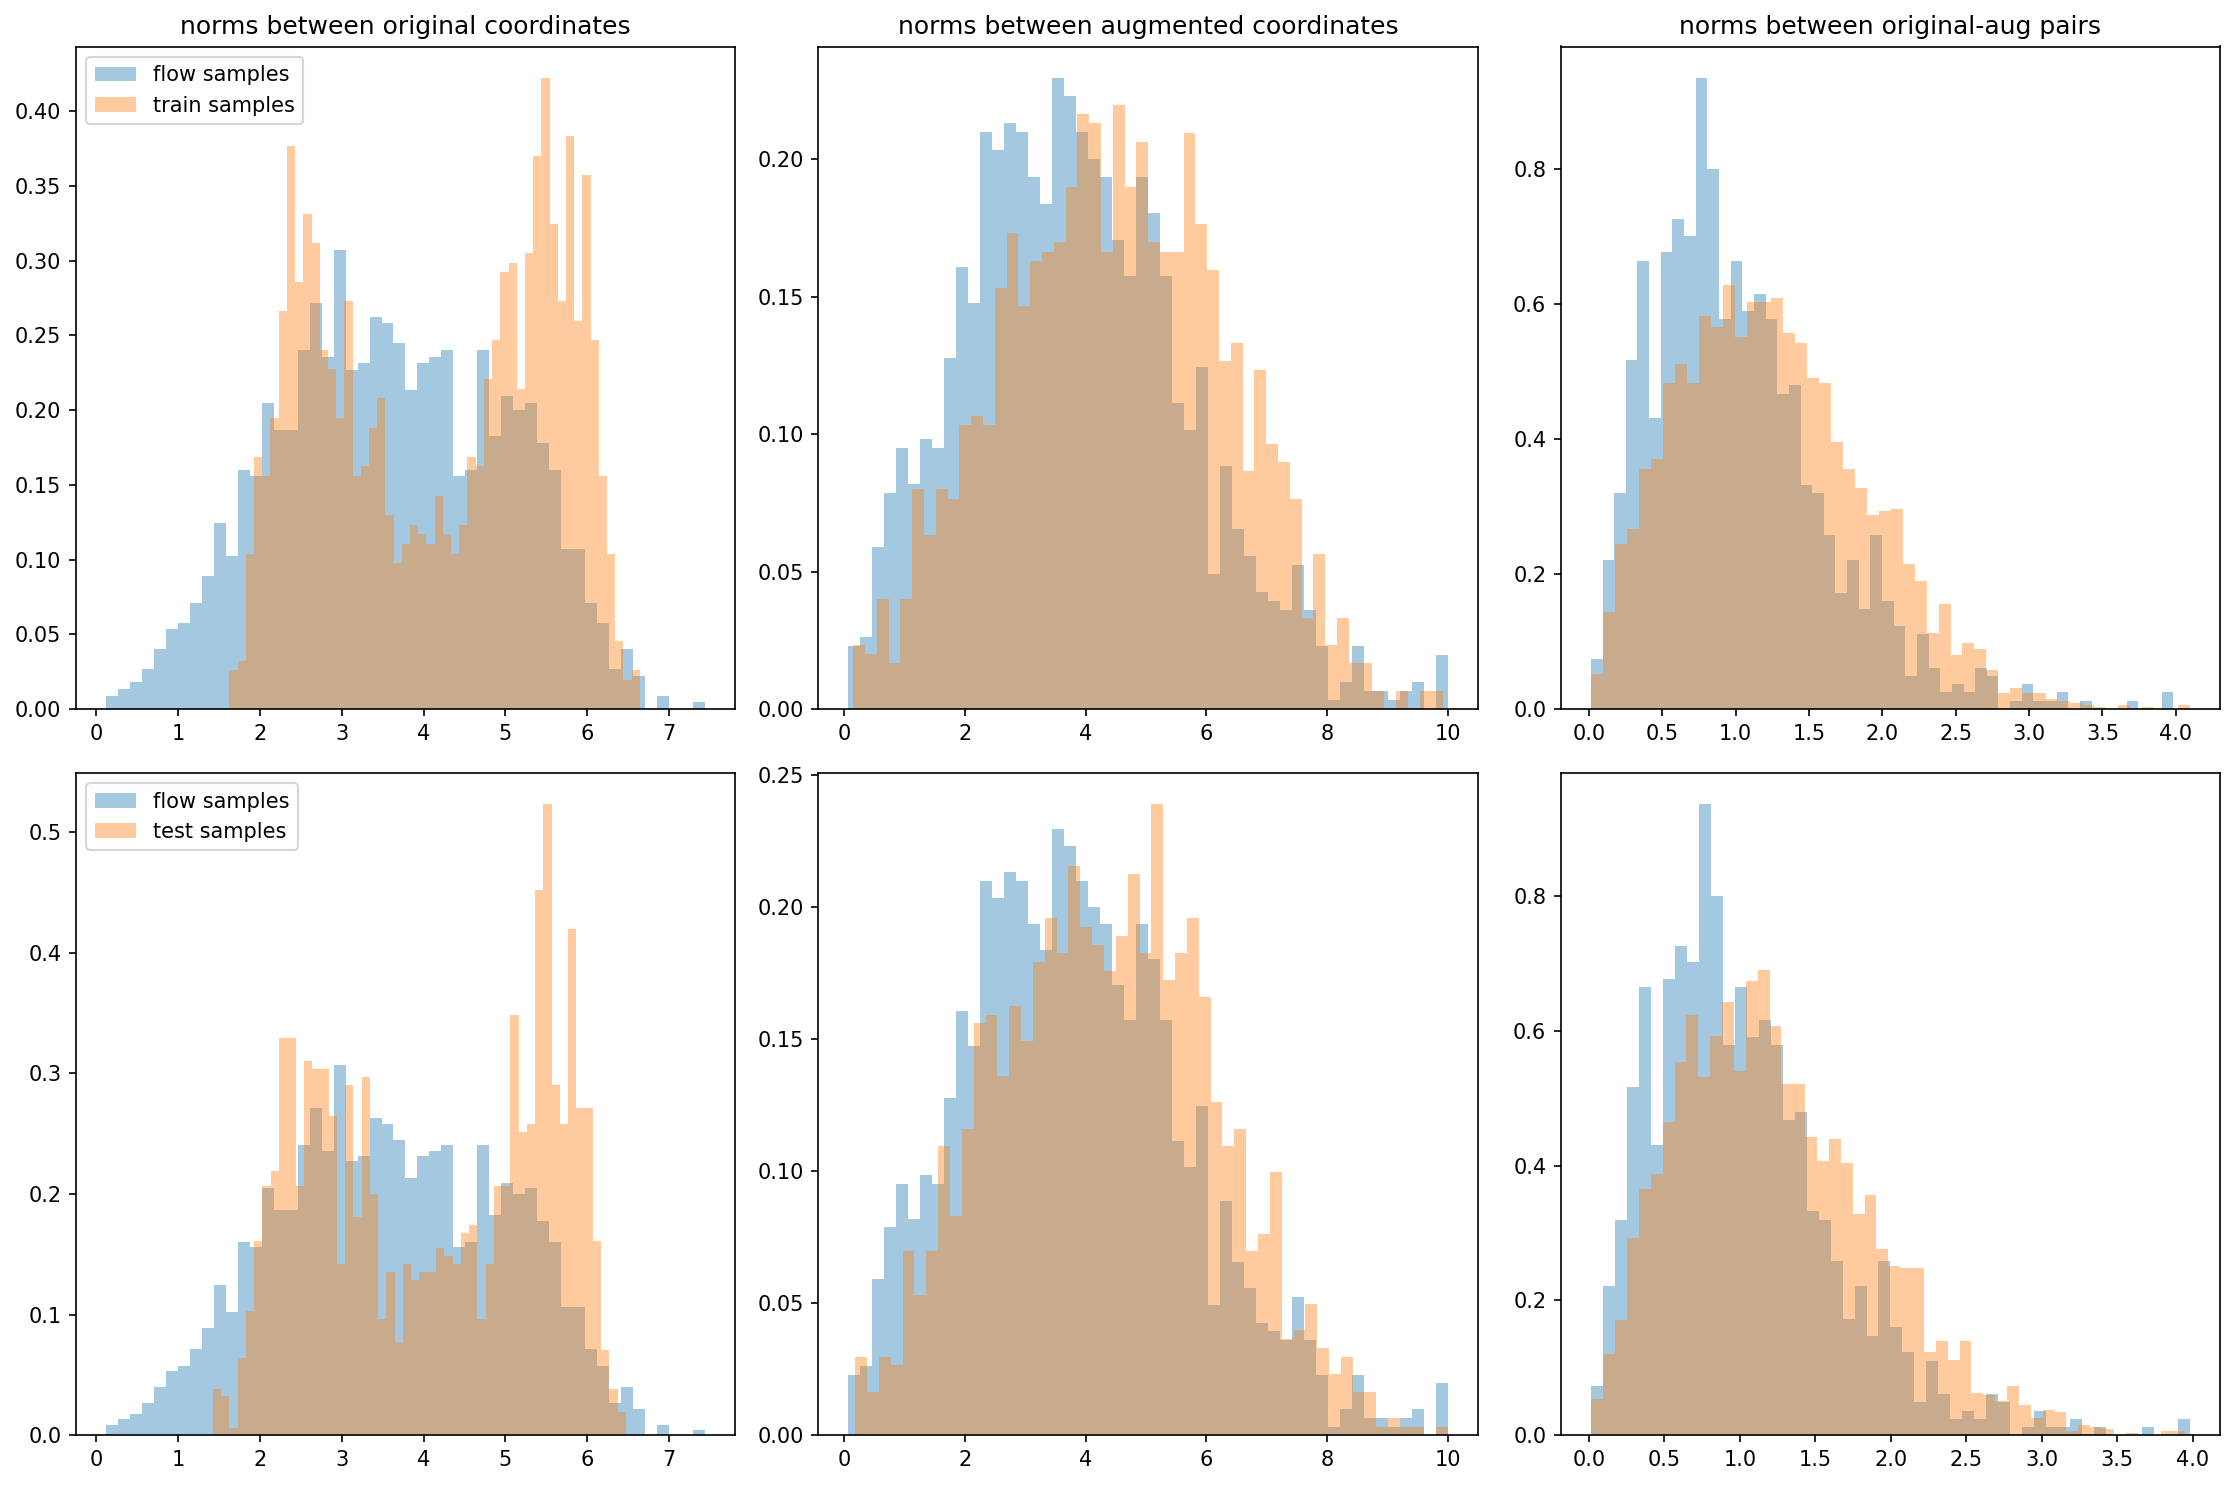

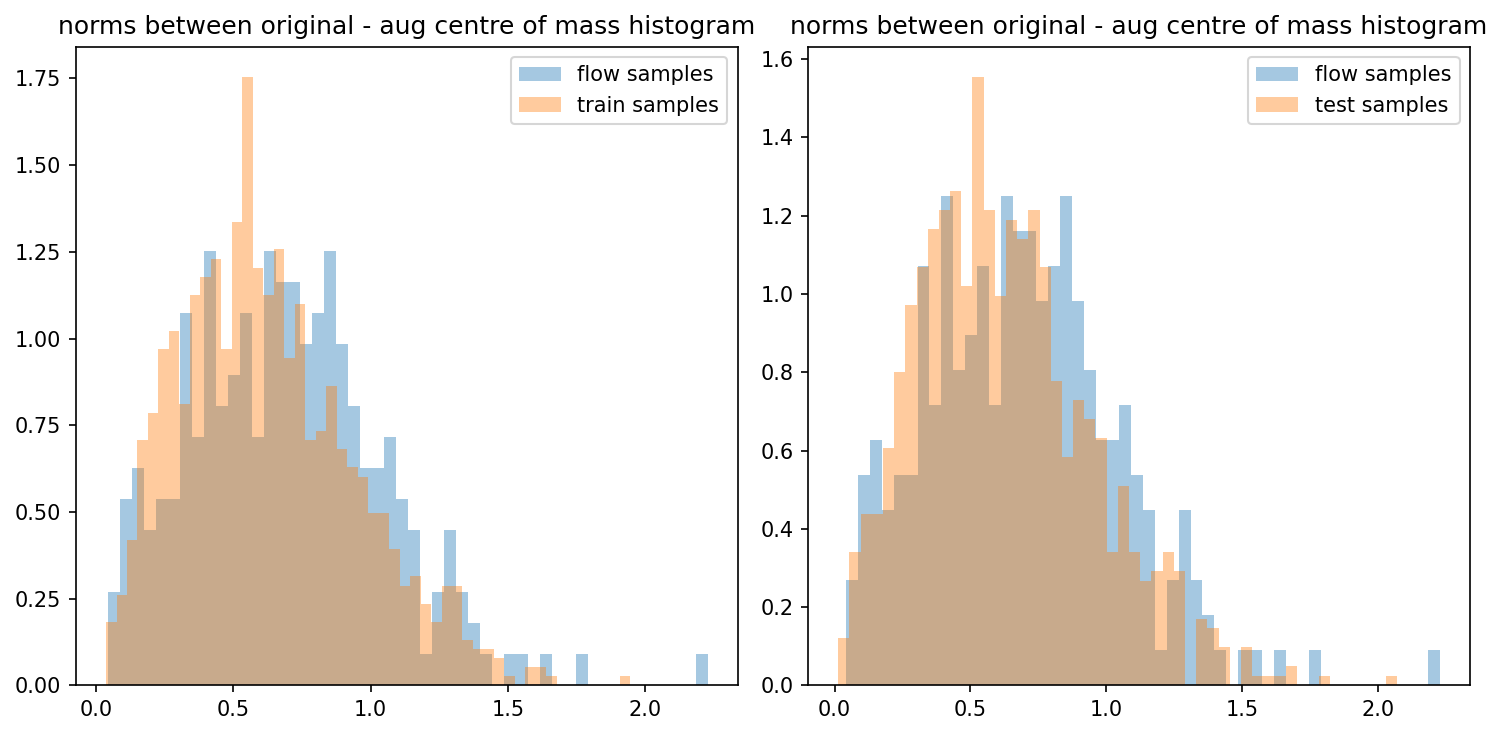

 47%|███████████████████▋                      | 47/100 [00:31<00:15,  3.33it/s]

{'eval_log_lik': Array(-24.32746, dtype=float32), 'eval_marginal_log_lik': Array(-10.820647, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.659363e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.4469147e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.72986984, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.75791, dtype=float32)}


 57%|███████████████████████▉                  | 57/100 [00:32<00:05,  8.18it/s]

{'eval_log_lik': Array(-23.867577, dtype=float32), 'eval_marginal_log_lik': Array(-10.338385, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00011673, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.6374586e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.71266234, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.482487, dtype=float32)}


 59%|████████████████████████▊                 | 59/100 [00:32<00:04,  9.07it/s]

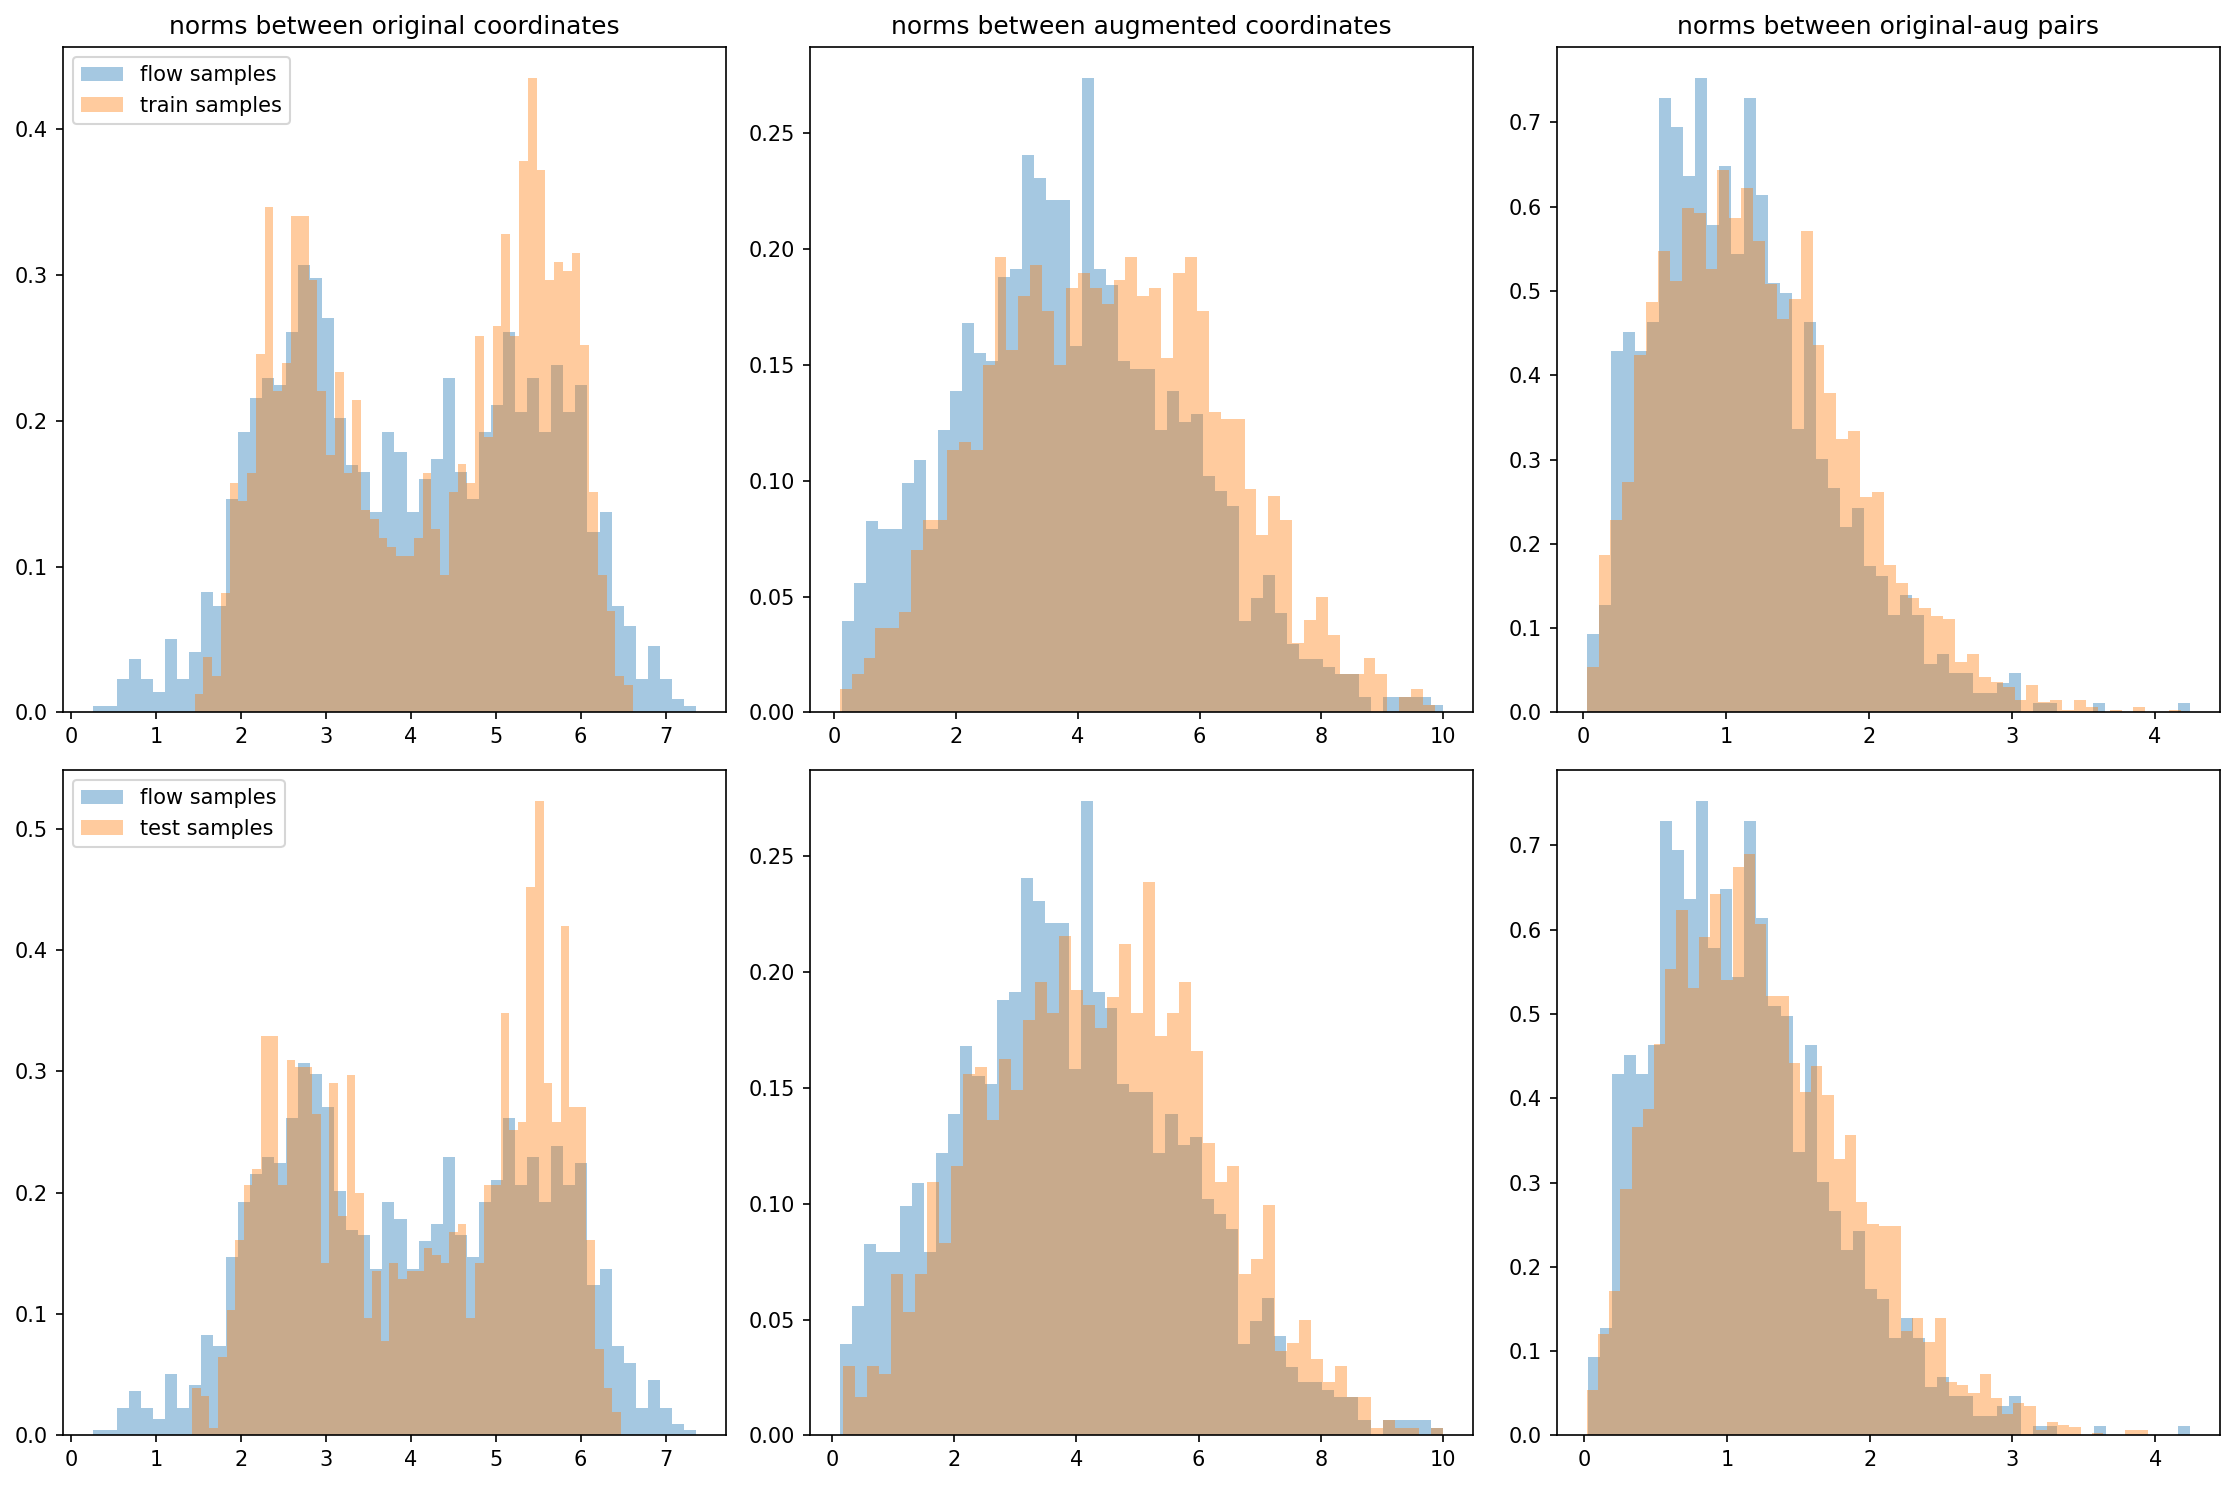

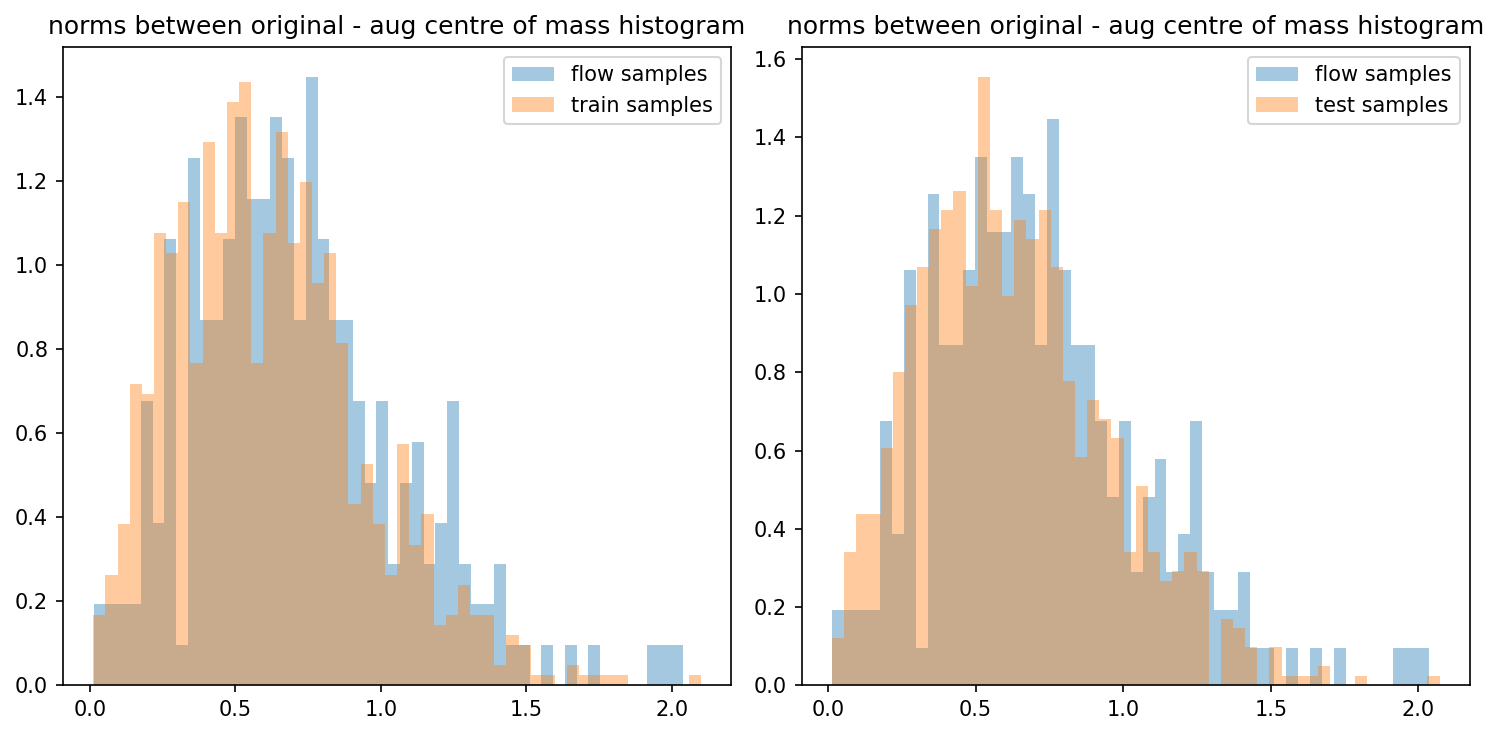

 69%|████████████████████████████▉             | 69/100 [00:36<00:06,  4.49it/s]

{'eval_log_lik': Array(-23.503632, dtype=float32), 'eval_marginal_log_lik': Array(-9.947181, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(8.850098e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.526642e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.73325497, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.147236, dtype=float32)}


 79%|█████████████████████████████████▏        | 79/100 [00:37<00:02,  8.91it/s]

{'eval_log_lik': Array(-23.43077, dtype=float32), 'eval_marginal_log_lik': Array(-9.908805, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00012169, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.512909e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.72683793, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.024244, dtype=float32)}


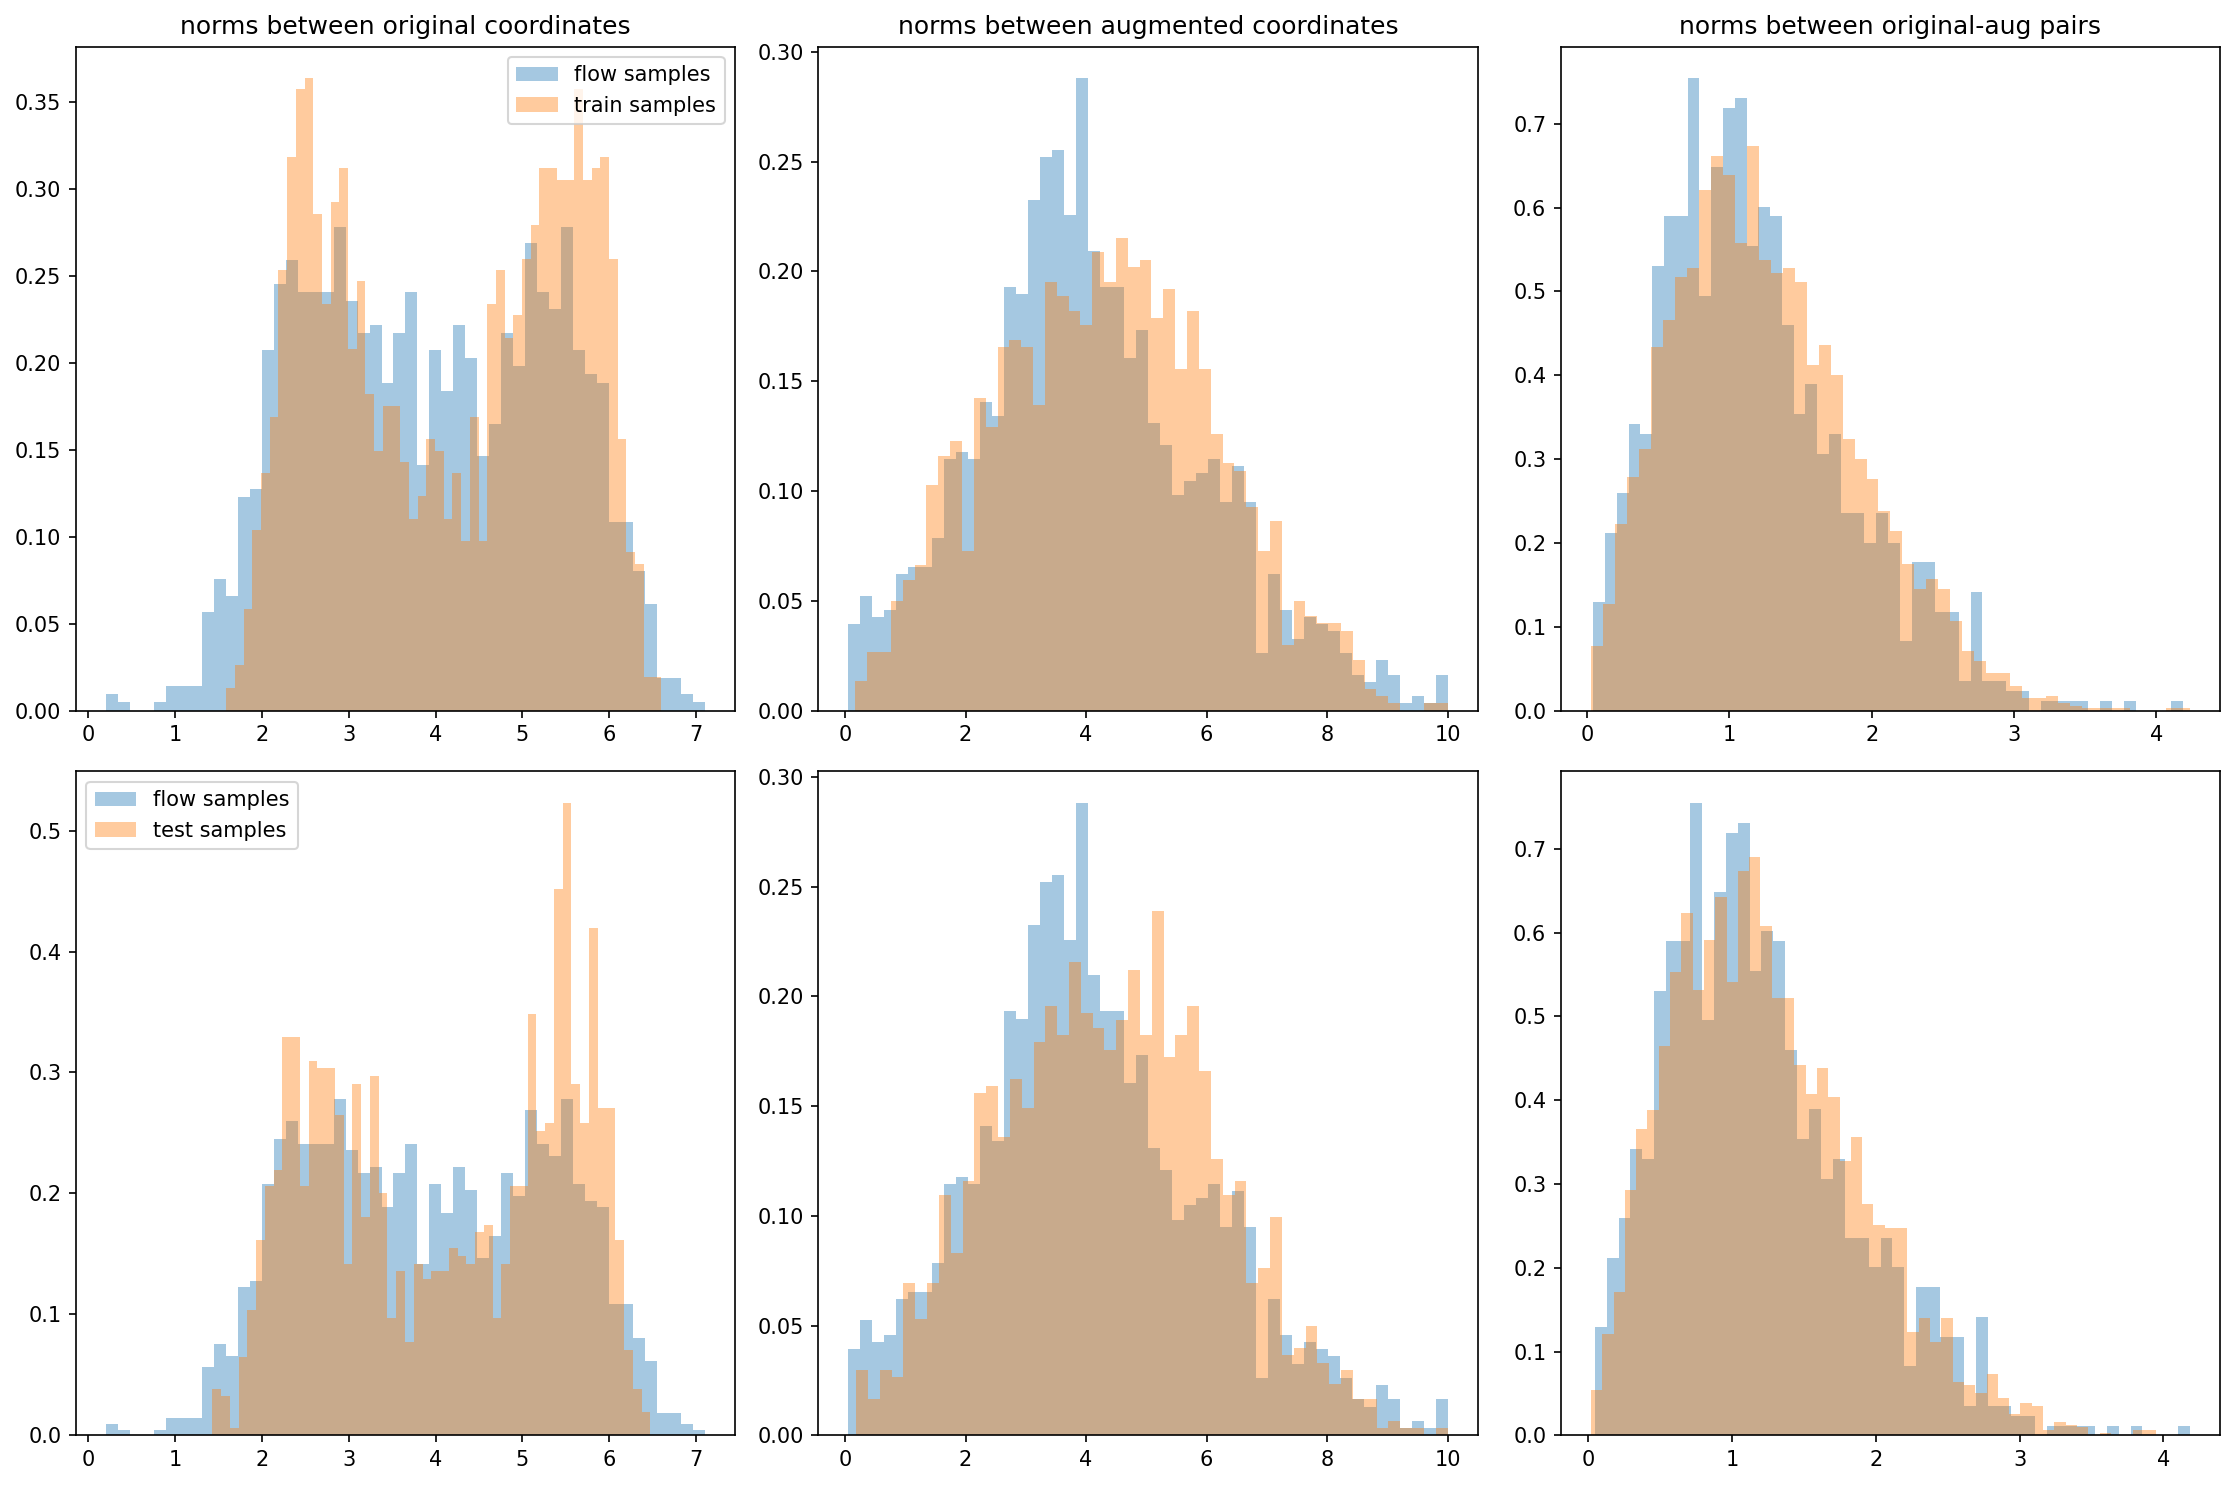

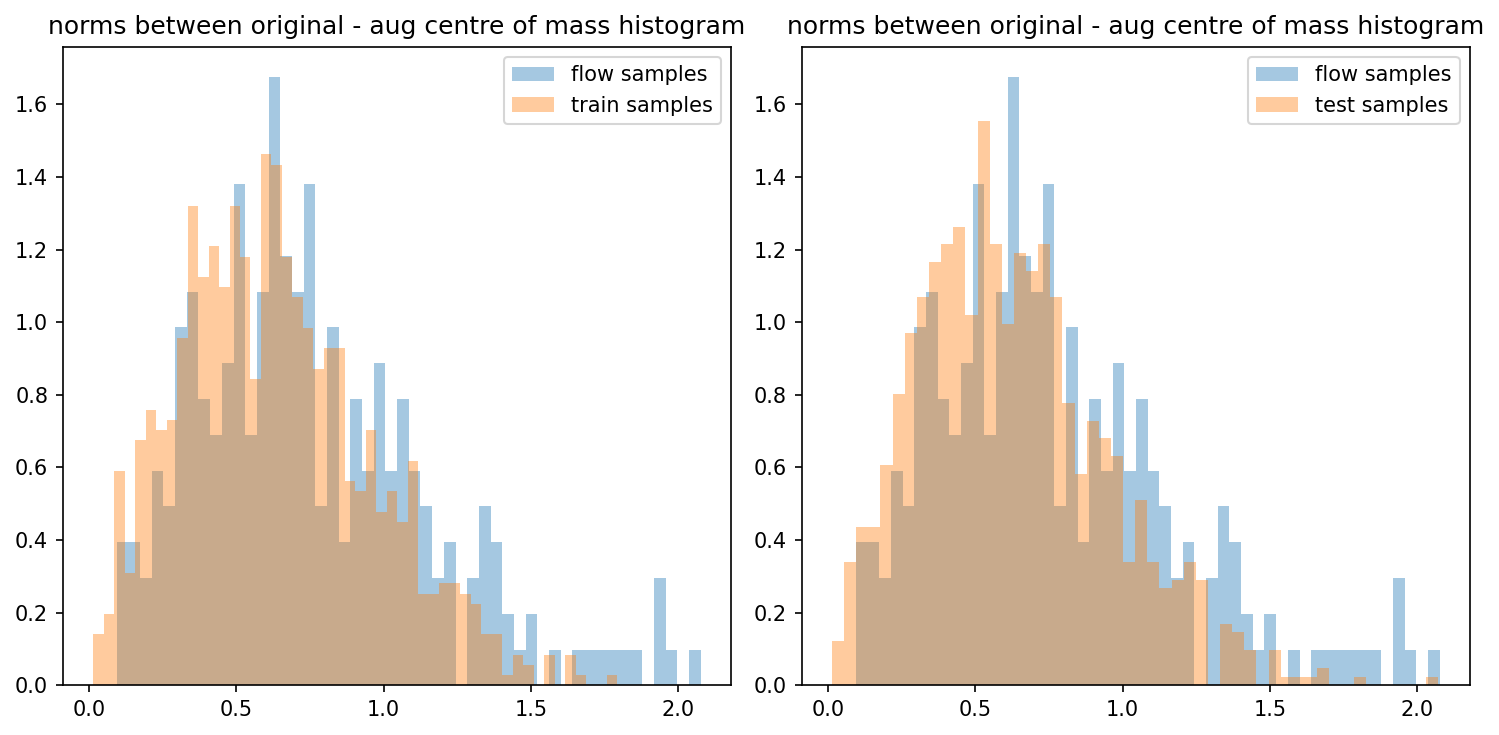

 91%|██████████████████████████████████████▏   | 91/100 [00:42<00:01,  5.19it/s]

{'eval_log_lik': Array(-23.326456, dtype=float32), 'eval_marginal_log_lik': Array(-9.75675, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(9.765625e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.5905382e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.79316723, dtype=float32), 'mean_diff_x_space_after_group_action': Array(27.083893, dtype=float32)}


 99%|█████████████████████████████████████████▌| 99/100 [00:43<00:00,  9.22it/s]

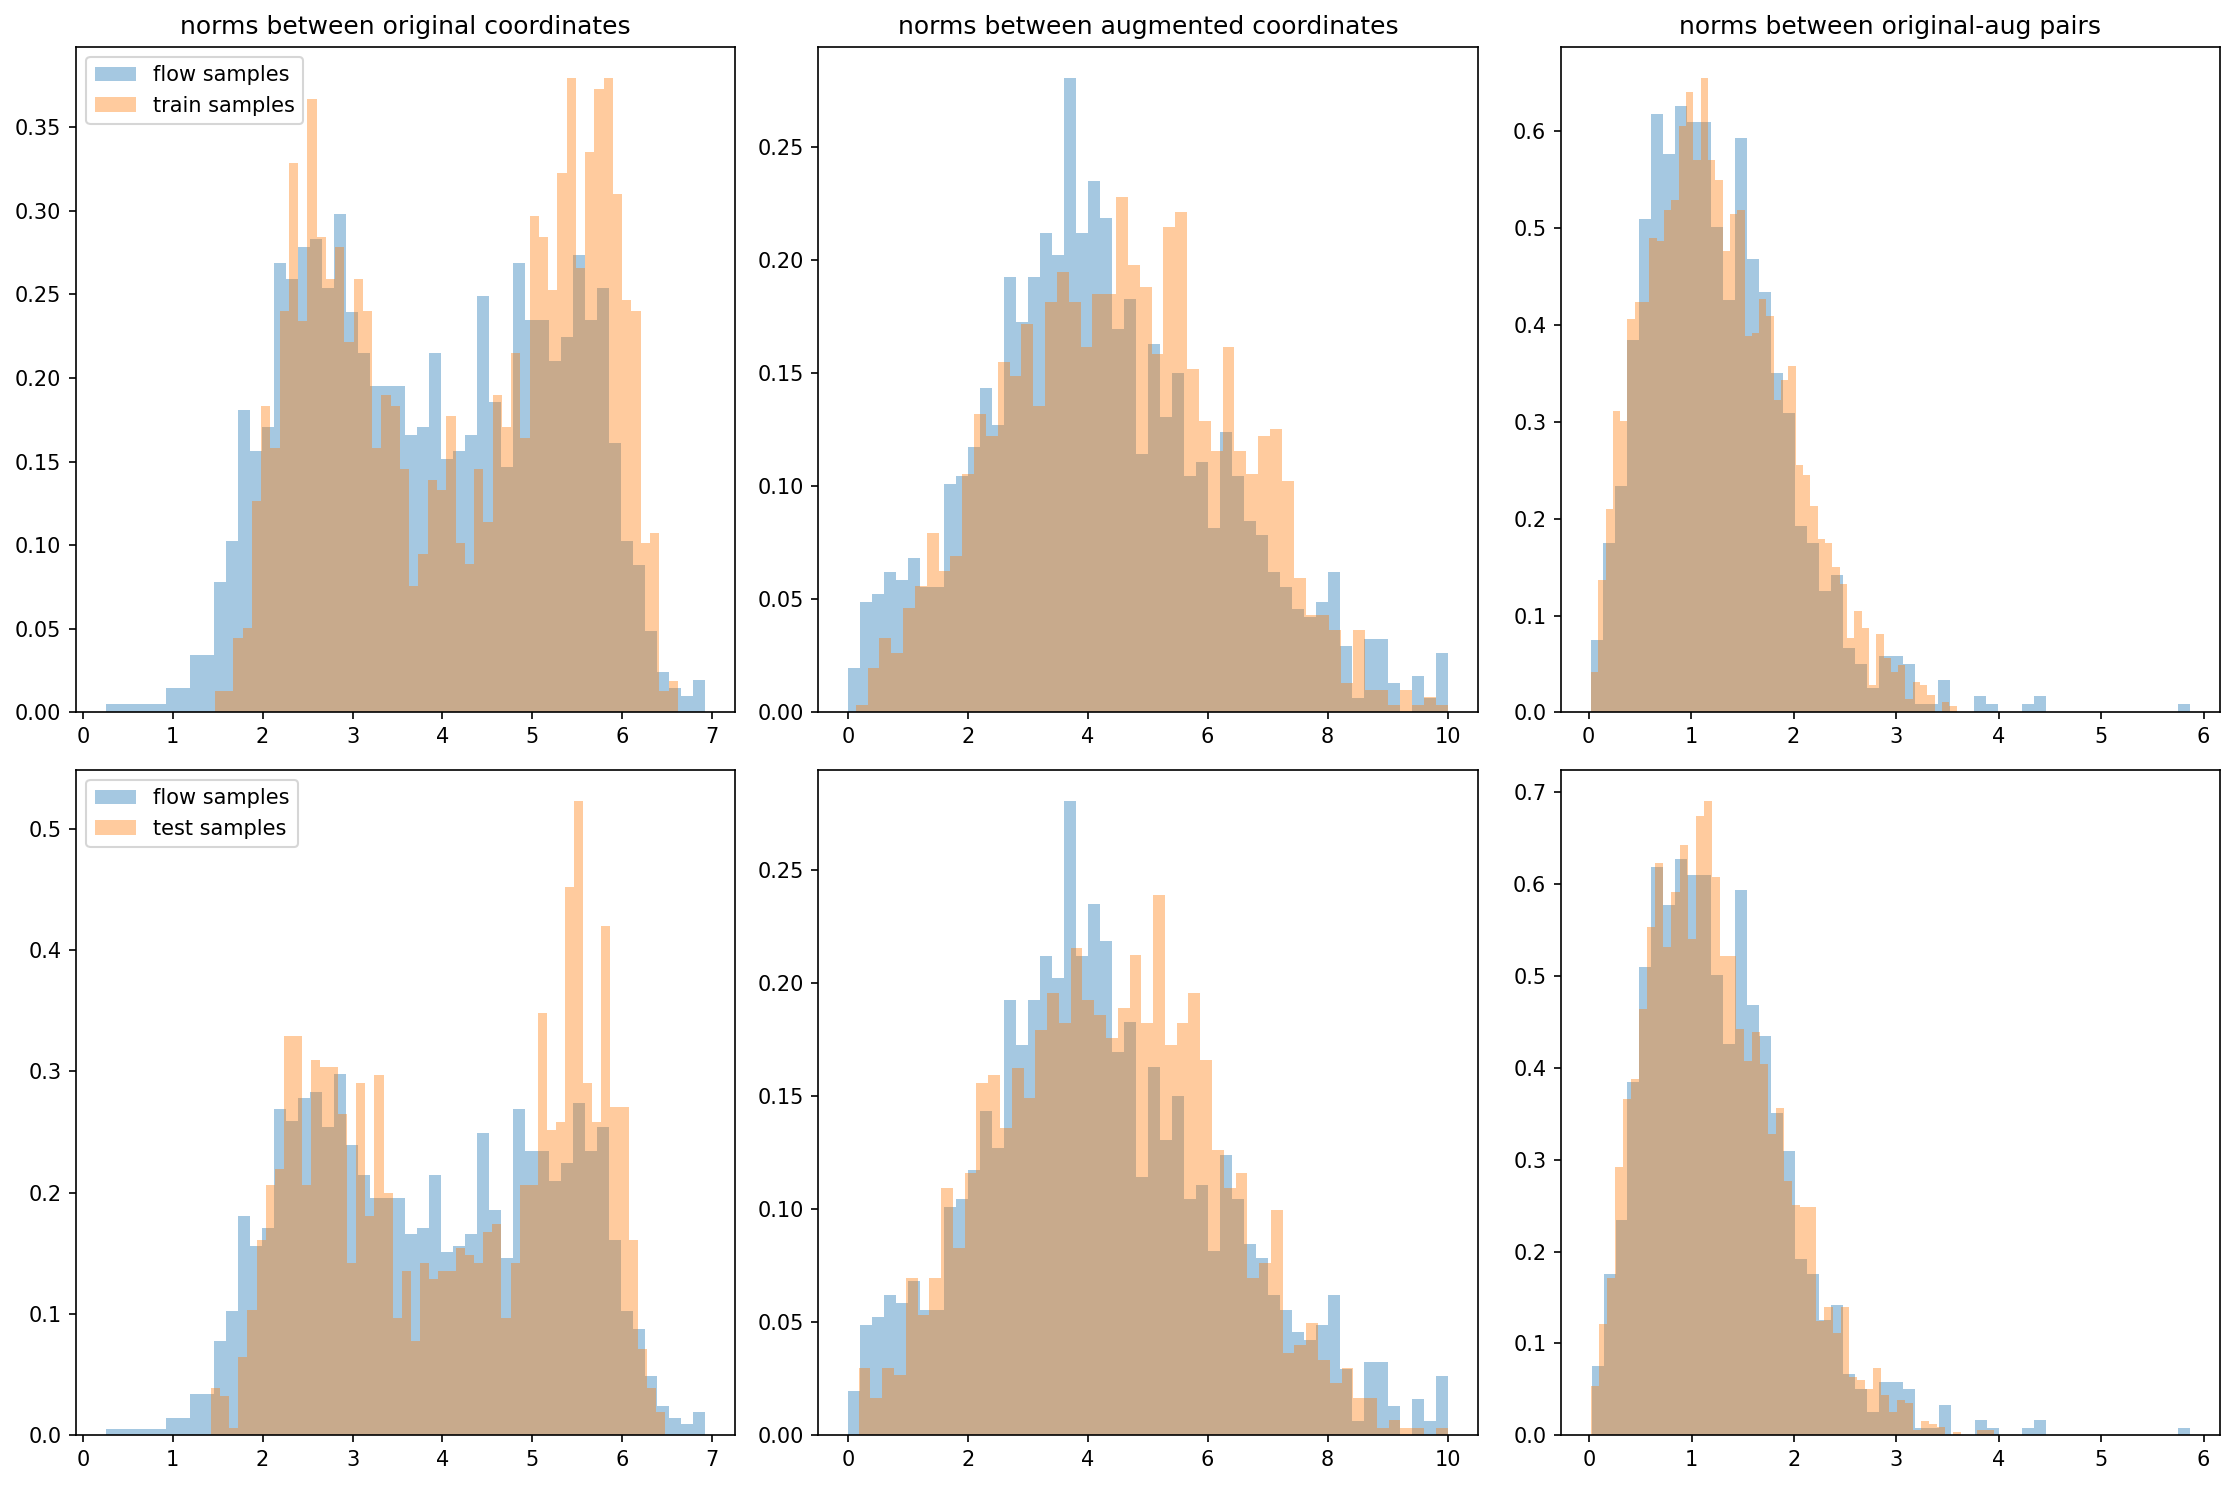

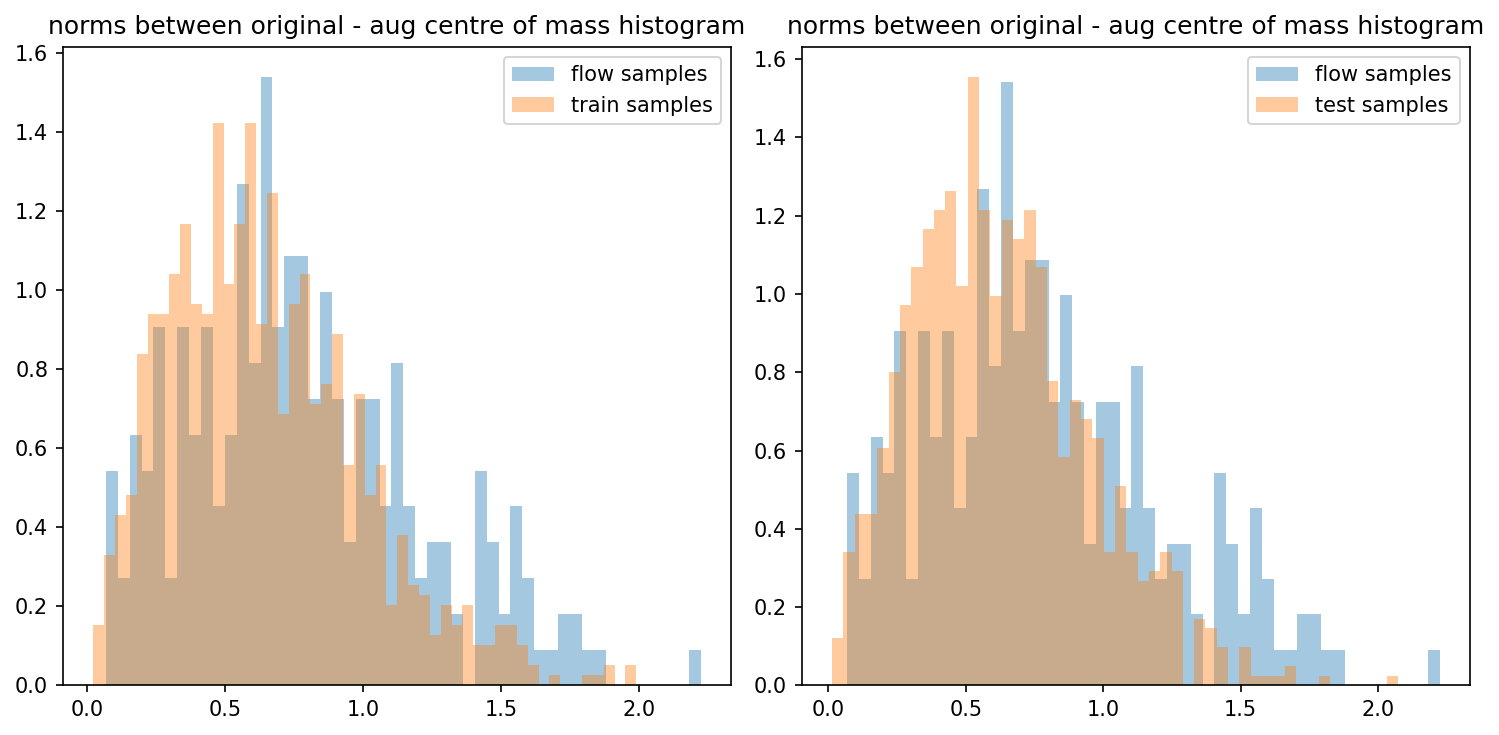

100%|█████████████████████████████████████████| 100/100 [00:47<00:00,  2.11it/s]


{'eval_log_lik': Array(-23.275051, dtype=float32), 'eval_marginal_log_lik': Array(-9.640145, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00011292, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.7644883e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.75716734, dtype=float32), 'mean_diff_x_space_after_group_action': Array(26.603958, dtype=float32)}


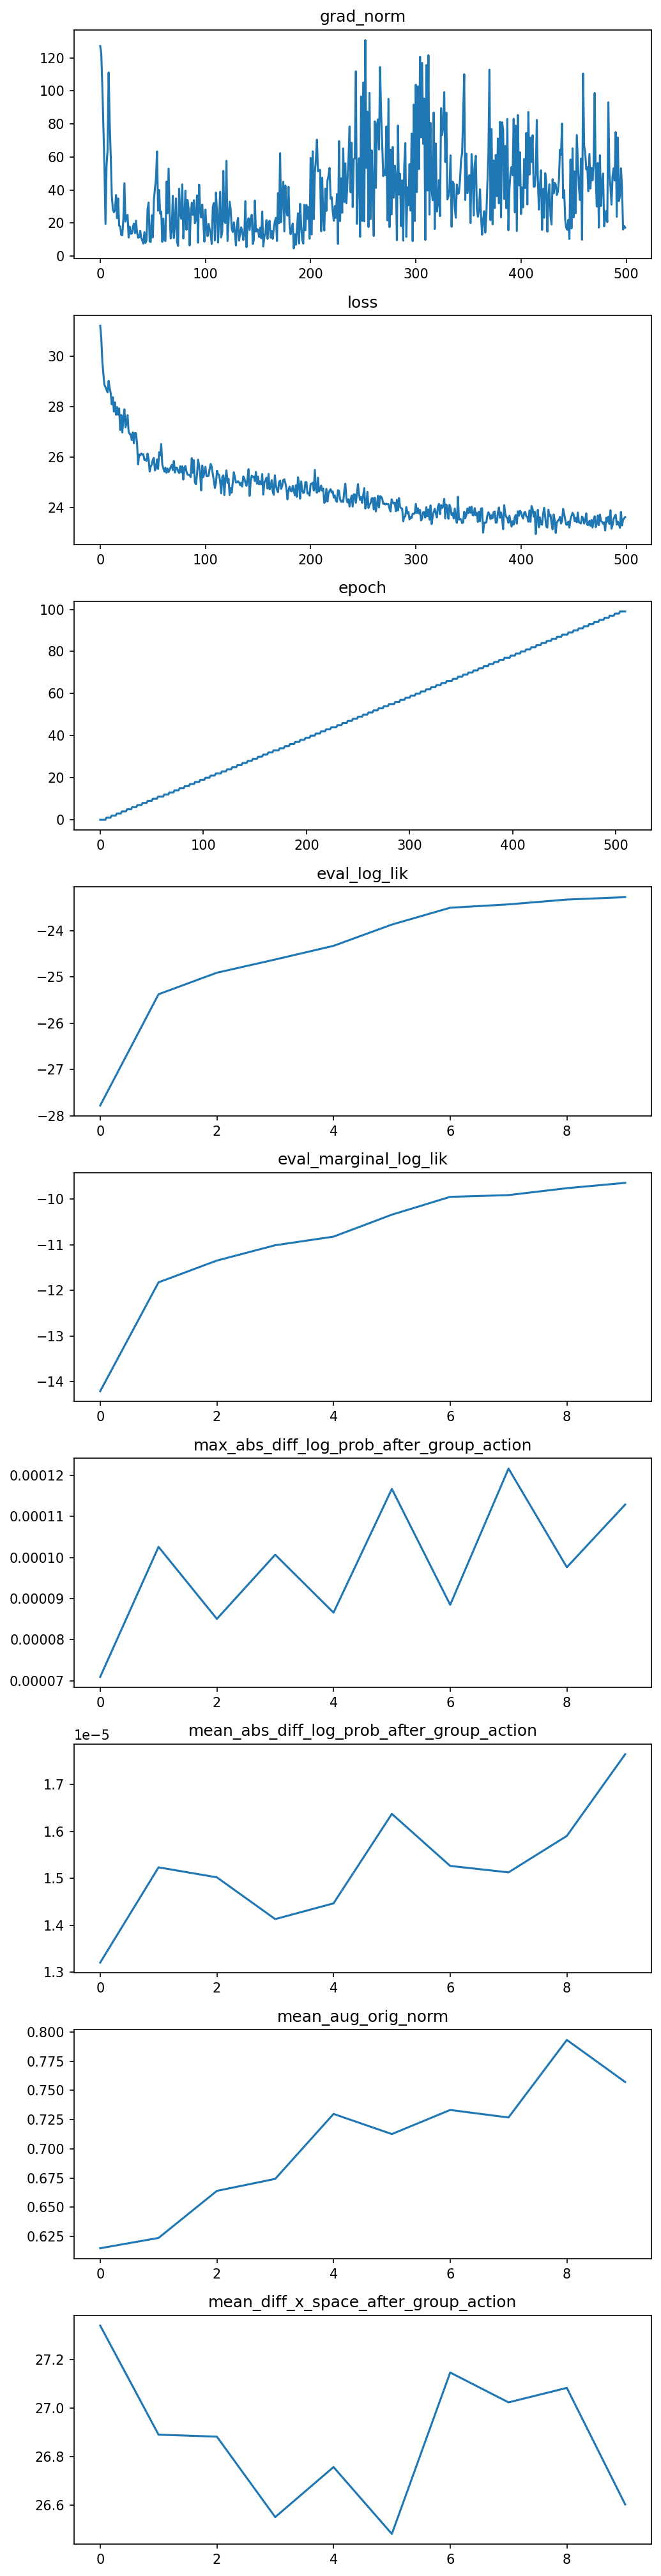

In [8]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [9]:
train_data_original, test_data_original = load_dataset(batch_size=cfg.training.batch_size, 
                                           train_set_size=1000, 
                                           test_set_size=1000)1.0

SyntaxError: invalid syntax (2471204016.py, line 3)

In [ ]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [ ]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

# Aug target, centre of mass centered.
Does much worse

In [ ]:
cfg.target.aug_global_centering = True
cfg.target.aug_scale = 1.0

In [ ]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)
logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [ ]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [ ]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

# Aug target conditional, low noise

In [ ]:
cfg.target.aug_global_centering = False
cfg.target.aug_scale = 0.1

In [ ]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)
logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [ ]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

In [ ]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

# 